In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
import sqlite3 as sql

In [ ]:
%load_ext rpy2.ipython

In [ ]:
url="https://raw.githubusercontent.com/gvergaraa77/Dataset/main/Preprocessing.csv"

In [ ]:
dataset=pd.read_csv(url, delimiter=';')

In [ ]:
dataset

,Origen,Genero,Hombres,Mujeres,Sur,Norte,No encontrada
0,N,M,14,11,10,15,NaN
1,S,F,37,11,14,34,NaN
2,N,M,6,5,4,7,NaN
3,N,M,14,6,8,12,NaN
4,S,F,26,8,15,19,NaN
...,...,...,...,...,...,...,...
64,S,M,126,39,98,67,NaN
65,S,M,107,57,15,147,2.0
66,S,F,34,8,15,27,NaN
67,S,M,15,3,8,10,NaN


In [ ]:
df=dataset

In [ ]:
df=df.astype({"Hombres":float,"Mujeres":float,"Norte":float,"Sur":float})

In [ ]:
df

,Origen,Genero,Hombres,Mujeres,Sur,Norte,No encontrada
0,N,M,14.0,11.0,10.0,15.0,NaN
1,S,F,37.0,11.0,14.0,34.0,NaN
2,N,M,6.0,5.0,4.0,7.0,NaN
3,N,M,14.0,6.0,8.0,12.0,NaN
4,S,F,26.0,8.0,15.0,19.0,NaN
...,...,...,...,...,...,...,...
64,S,M,126.0,39.0,98.0,67.0,NaN
65,S,M,107.0,57.0,15.0,147.0,2.0
66,S,F,34.0,8.0,15.0,27.0,NaN
67,S,M,15.0,3.0,8.0,10.0,NaN


In [ ]:
conn = sql.connect('dfkatrim.db')
df.to_sql('dfkatrim', conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
df=pd.read_sql('SELECT Origen AS "Nacionalidad", Genero AS "Género", Hombres, Mujeres, Hombres+Mujeres AS "Total", Hombres/(Hombres+Mujeres) AS "Porc Hombres", Mujeres/(Hombres+Mujeres) AS "Porc Mujeres", Norte, Sur, Norte+Sur AS "Total Global", Norte/(Norte+Sur) AS "Porc Norte", Sur/(Norte+Sur) AS "Porc Sur" FROM dfkatrim' ,conn)
df

,Nacionalidad,Género,Hombres,Mujeres,Total,Porc Hombres,Porc Mujeres,Norte,Sur,Total Global,Porc Norte,Porc Sur
0,N,M,14.0,11.0,25.0,0.560000,0.440000,15.0,10.0,25.0,0.600000,0.400000
1,S,F,37.0,11.0,48.0,0.770833,0.229167,34.0,14.0,48.0,0.708333,0.291667
2,N,M,6.0,5.0,11.0,0.545455,0.454545,7.0,4.0,11.0,0.636364,0.363636
3,N,M,14.0,6.0,20.0,0.700000,0.300000,12.0,8.0,20.0,0.600000,0.400000
4,S,F,26.0,8.0,34.0,0.764706,0.235294,19.0,15.0,34.0,0.558824,0.441176
...,...,...,...,...,...,...,...,...,...,...,...,...
64,S,M,126.0,39.0,165.0,0.763636,0.236364,67.0,98.0,165.0,0.406061,0.593939
65,S,M,107.0,57.0,164.0,0.652439,0.347561,147.0,15.0,162.0,0.907407,0.092593
66,S,F,34.0,8.0,42.0,0.809524,0.190476,27.0,15.0,42.0,0.642857,0.357143
67,S,M,15.0,3.0,18.0,0.833333,0.166667,10.0,8.0,18.0,0.555556,0.444444


In [ ]:
conn = sql.connect('dfnac.db')
df.to_sql('dfnac', conn)
dfnac=pd.read_sql('SELECT Nacionalidad, COUNT(*) AS "Total" FROM dfnac GROUP BY Nacionalidad' ,conn)
dfnac

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Nacionalidad,Total
0,N,10
1,S,59


In [ ]:
conn = sql.connect('dfgen8.db')
df.to_sql('dfgen8', conn)
dfgen=pd.read_sql('SELECT Género, COUNT(*) AS "Total" FROM dfgen8 GROUP BY Género' ,conn)
dfgen

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Género,Total
0,F,32
1,M,37


In [ ]:
dfplot=pd.melt(df, id_vars=['Nacionalidad','Género','Norte','Sur'], value_vars=['Hombres', 'Mujeres'], var_name='Género Autor', value_name='Total Género Autor')
dfplot=pd.melt(dfplot, id_vars=['Nacionalidad','Género','Género Autor','Total Género Autor'], value_vars=['Norte', 'Sur'], var_name='Origen Autor', value_name='Total Origen Autor')
dfplot

,Nacionalidad,Género,Género Autor,Total Género Autor,Origen Autor,Total Origen Autor
0,N,M,Hombres,14.0,Norte,15.0
1,S,F,Hombres,37.0,Norte,34.0
2,N,M,Hombres,6.0,Norte,7.0
3,N,M,Hombres,14.0,Norte,12.0
4,S,F,Hombres,26.0,Norte,19.0
...,...,...,...,...,...,...
271,S,M,Mujeres,39.0,Sur,98.0
272,S,M,Mujeres,57.0,Sur,15.0
273,S,F,Mujeres,8.0,Sur,15.0
274,S,M,Mujeres,3.0,Sur,8.0


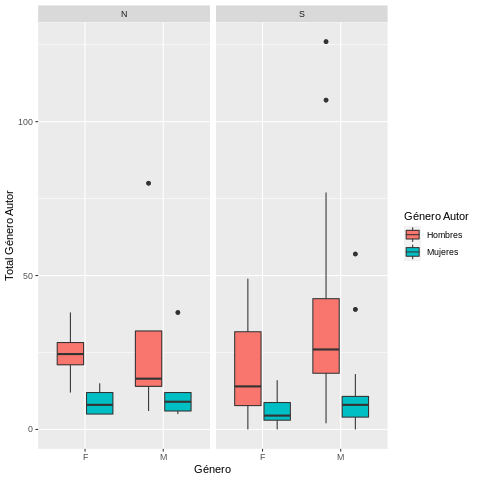

In [ ]:
%%R -i dfplot

library(ggplot2)

ggplot(dfplot,aes(Género, `Total Género Autor`,fill=`Género Autor`))+geom_boxplot()+ facet_grid(. ~ `Nacionalidad`)

In [ ]:
conn = sql.connect('dfpx1.db')
df.to_sql('dfpx1', conn)
dfpx1=pd.read_sql('SELECT Nacionalidad, Género, COUNT(*) FROM dfpx1 GROUP BY Nacionalidad, Género' ,conn)
dfpx1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Nacionalidad,Género,COUNT(*)
0,N,F,4
1,N,M,6
2,S,F,28
3,S,M,31


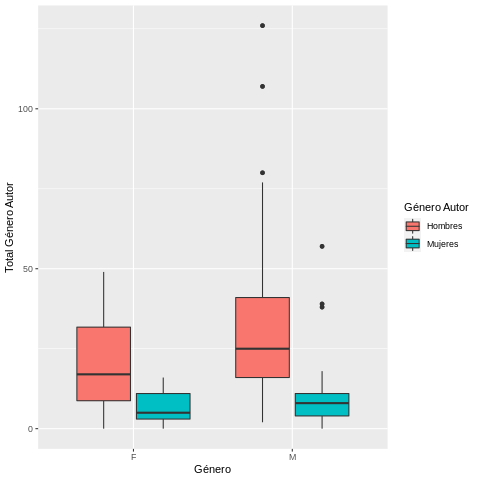

In [ ]:
%%R -i dfplot

library(ggplot2)

ggplot(dfplot,aes(Género, `Total Género Autor`,fill=`Género Autor`))+geom_boxplot()

In [ ]:
conn = sql.connect('dfpx5.db')
df.to_sql('dfpx5', conn)
dfpx5=pd.read_sql('SELECT Género, SUM(Mujeres), SUM(Total) FROM dfpx5 GROUP BY Género' ,conn)
dfpx5

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Género,SUM(Mujeres),SUM(Total)
0,F,202.0,850.0
1,M,380.0,1609.0


Parece ser que las mujeres no pasan del 25% en las recomendaciones por profesores...

In [ ]:
conn = sql.connect('dfpx6.db')
df.to_sql('dfpx6', conn)
dfpx6=pd.read_sql('SELECT SUM(Mujeres), SUM(Total) FROM dfpx6' ,conn)
dfpx6

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,SUM(Mujeres),SUM(Total)
0,582.0,2459.0


Tal parece que sí... Comprobémoslo!

In [ ]:
%%R

prop.test(x=582, n=2459, conf.level=0.95)


	1-sample proportions test with continuity correction

data:  582 out of 2459, null probability 0.5
X-squared = 680.94, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2201025 0.2540920
sample estimates:
        p 
0.2366816 



Veamos ahora comparando géneros de profesores...


In [ ]:
%%R

prop.test(x=c(380,202), n=c(1609,850), conf.level=0.95)


	2-sample test for equality of proportions with continuity correction

data:  c(380, 202) out of c(1609, 850)
X-squared = 0.0010233, df = 1, p-value = 0.9745
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03772230  0.03477125
sample estimates:
   prop 1    prop 2 
0.2361715 0.2376471 



No hay diferencias...

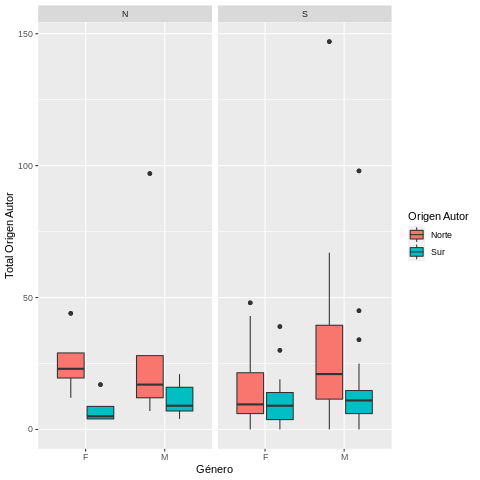

In [ ]:
%%R -i dfplot

library(ggplot2)

ggplot(dfplot,aes(Género, `Total Origen Autor`,fill=`Origen Autor`))+geom_boxplot()+ facet_grid(. ~ `Nacionalidad`)

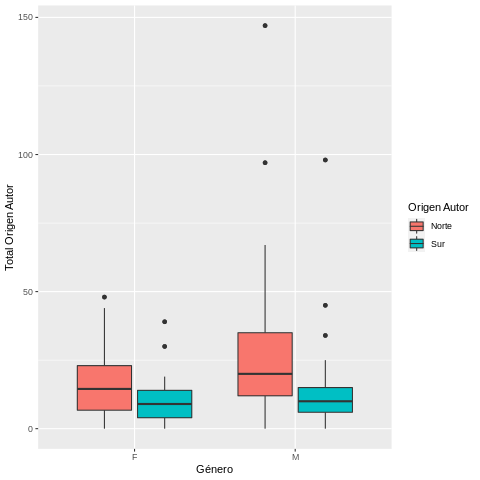

In [ ]:
%%R -i dfplot

library(ggplot2)

ggplot(dfplot,aes(Género, `Total Origen Autor`,fill=`Origen Autor`))+geom_boxplot()

In [ ]:
conn = sql.connect('dfpy5.db')
df.to_sql('dfpy5', conn)
dfpy5=pd.read_sql('SELECT Género, SUM(Sur), SUM("Total Global") FROM dfpy5 GROUP BY Género' ,conn)
dfpy5

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Género,SUM(Sur),"SUM(""Total Global"")"
0,F,321.0,848.0
1,M,522.0,1604.0


Parece ser que los profesores del sur no pasan del 33% en las recomendaciones por profesores...

In [ ]:
conn = sql.connect('dfpy6.db')
df.to_sql('dfpy6', conn)
dfpy6=pd.read_sql('SELECT SUM(Sur), SUM("Total Global") FROM dfpy6' ,conn)
dfpy6

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,SUM(Sur),"SUM(""Total Global"")"
0,843.0,2452.0


Tal parece que sí... Comprobémoslo!

In [ ]:
%%R

prop.test(x=843, n=2452, conf.level=0.95)


	1-sample proportions test with continuity correction

data:  843 out of 2452, null probability 0.5
X-squared = 238.67, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3250574 0.3630385
sample estimates:
       p 
0.343801 



Veamos ahora comparando géneros de profesores...

In [ ]:
%%R

prop.test(x=c(522,321), n=c(1604,848), conf.level=0.95)


	2-sample test for equality of proportions with continuity correction

data:  c(522, 321) out of c(1604, 848)
X-squared = 6.7, df = 1, p-value = 0.009641
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09389535 -0.01230731
sample estimates:
   prop 1    prop 2 
0.3254364 0.3785377 



## 16 de octubre

In [ ]:
conn = sql.connect('dfpxyz.db')
df.to_sql('dfpxyz', conn)
dfpxyz=pd.read_sql('SELECT Género, SUM(Mujeres), SUM(Total), SUM(Sur), SUM("Total Global") FROM dfpxyz WHERE Nacionalidad="S" GROUP BY Género' ,conn)
dfpxyz

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Género,SUM(Mujeres),SUM(Total),SUM(Sur),"SUM(""Total Global"")"
0,F,166.0,715.0,290.0,715.0
1,M,301.0,1365.0,456.0,1360.0


In [ ]:
%%R

prop.test(x=c(456,290), n=c(1360,715), conf.level=0.95)


	2-sample test for equality of proportions with continuity correction

data:  c(456, 290) out of c(1360, 715)
X-squared = 9.7551, df = 1, p-value = 0.001788
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1152399 -0.0253607
sample estimates:
   prop 1    prop 2 
0.3352941 0.4055944 



In [ ]:
%%R

prop.test(x=c(301,166), n=c(1365,715), conf.level=0.95)


	2-sample test for equality of proportions with continuity correction

data:  c(301, 166) out of c(1365, 715)
X-squared = 0.3022, df = 1, p-value = 0.5825
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05068767  0.02737765
sample estimates:
   prop 1    prop 2 
0.2205128 0.2321678 



In [ ]:
conn = sql.connect('dfpxyzw.db')
df.to_sql('dfpxyzw', conn)
dfpxyzw=pd.read_sql('SELECT Género, SUM(Mujeres), SUM(Total), SUM(Sur), SUM("Total Global") FROM dfpxyzw WHERE Nacionalidad="N" GROUP BY Género' ,conn)
dfpxyzw

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Género,SUM(Mujeres),SUM(Total),SUM(Sur),"SUM(""Total Global"")"
0,F,36.0,135.0,31.0,133.0
1,M,79.0,244.0,66.0,244.0


In [ ]:
%%R

prop.test(x=c(79,36), n=c(244,135), conf.level=0.95)


	2-sample test for equality of proportions with continuity correction

data:  c(79, 36) out of c(244, 135)
X-squared = 1.0843, df = 1, p-value = 0.2977
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04357827  0.15778592
sample estimates:
   prop 1    prop 2 
0.3237705 0.2666667 



In [ ]:
%%R

prop.test(x=c(66,31), n=c(244,133), conf.level=0.95)


	2-sample test for equality of proportions with continuity correction

data:  c(66, 31) out of c(244, 133)
X-squared = 0.44982, df = 1, p-value = 0.5024
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0593371  0.1341553
sample estimates:
   prop 1    prop 2 
0.2704918 0.2330827 

